In [37]:
# 1. Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
# 2. Load the data
file_path = "Groceries_dataset.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

In [41]:
# 3. Understand the data
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
       Member_number        Date        itemDescription
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ 

In [43]:
# 4. Check for null values and duplicates
null_values = data.isnull().sum()
print("Null values:\n", null_values)

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Null values:
 Member_number      0
Date               0
itemDescription    0
dtype: int64
Number of duplicate rows: 759


In [47]:
# 5. Apriori and Association Rules
# Step 1: Ensure the data is binary (True/False or 0/1) for Apriori
# Encoding the data into binary format
# If the data is transactional, ensure it's in binary format (e.g., one-hot encoding)
data_binary = pd.get_dummies(data)  # Convert categorical columns to binary format

# Step 2: Run Apriori on the encoded data
frequent_itemsets = apriori(data_binary, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:\n", rules)

C:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 1808

In [ ]:
# 6. Make plots
# Line plot
data.plot(kind='line')
plt.title('Line Plot')
plt.show()

# Bar plot
data.plot(kind='bar')
plt.title('Bar Plot')
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap for numeric data only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap for numeric data only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


First 5 rows of the data:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Frequent Itemsets:
    support                                itemsets
0      1.0                         (Member_number)
1      1.0                                  (Date)
2      1.0                       (itemDescription)
3      1.0                   (Member_number, Date)
4      

C:\Users\Admin\AppData\Local\Temp\ipykernel_15668\83803047.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_binary = data.applymap(lambda x: 1 if x not in [0, False, 'No', 'None', ''] else 0)
C:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


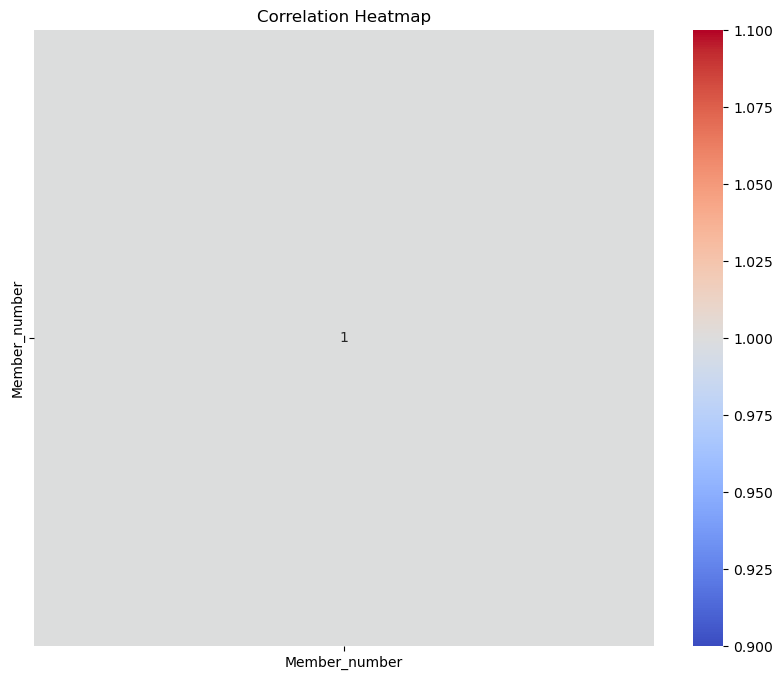

In [51]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# 2. Load the data
file_path = "Groceries_dataset.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# 3. Data exploration
print("First 5 rows of the data:")
print(data.head())
print("\nData Information:")
print(data.info())

# 4. Ensure binary conversion for Apriori
# For demonstration, we assume each row is a transaction and each column is an item
# Step 1: Convert all columns to binary (0 or 1)
data_binary = data.applymap(lambda x: 1 if x not in [0, False, 'No', 'None', ''] else 0)

# Step 2: Run Apriori on the binary-encoded data
frequent_itemsets = apriori(data_binary, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:\n", rules)

# 5. Heatmap for correlation (only numeric columns)
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
